In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [122]:
data = pd.read_csv("../scraping/jobs.csv")
df = pd.DataFrame(data)

In [156]:
work_mode = {
    "praca zdalna": "home office work",
    "praca hybrydowa": "hybrid work",
    "praca stacjonarna, hybrid work": "full office work, hybrid work",
    "praca stacjonarn": "full office work",
    "praca mobilna": "home office work",
    "praca stacjonarna, home office work": "full office work, home office work"
}

df["work mode"] = df["work mode"].replace(work_mode, regex=True)

unique_work_modes = df["work mode"].unique()
unique_work_modes

array(['hybrid work', 'home office work, hybrid work', 'home office work',
       'full office worka, home office work',
       'full office work, hybrid work', 'full office work',
       'full office worka, hybrid work',
       'full office worka, home office work, hybrid work',
       'full office worka',
       'full office work, home office work, hybrid work'], dtype=object)

In [157]:
unique_level = df["level"].unique()
unique_level

array(['senior specialist (Senior)', 'specialist (Mid / Regular)',
       'senior specialist (Senior), expert',
       'specialist (Mid / Regular), senior specialist (Senior)',
       'junior specialist (Junior)', 'team manager',
       'manager / coordinator, manager', 'manager / supervisor',
       'manager',
       'specialist (Mid / Regular), junior specialist (Junior)',
       'manager / coordinator', 'expert', 'trainee',
       'starszy specjalista (Senior) / expert',
       'manager / supervisor, team manager',
       'assistant, junior specialist (Junior)', 'trainee / intern',
       'director', 'assistant', 'director, team manager'], dtype=object)

In [158]:
translation = {
    "specjalista (Mid / Regular)": "specialist (Mid / Regular)",
    "młodszy specjalista (Junior)": "junior specialist (Junior)",
    "starszy specjalista (Senior)": "senior specialist (Senior)",
    "ekspert": "expert",
    "kierownik": "supervisor",
    "koordynator": "coordinator",
    "asystent": "assistant",
    "dyrektor": "director",
    "stażysta": "intern",
    "praktykant": "trainee",
    "menedżer": "manager",
    "manager / coordinator, menedżer": "manager / coordinator, manager",
    "starszy specjalista (Senior), expert": "starszy specjalista (Senior) / expert",
    "assistant, młodszy specjalista (Junior)": "assistant, junior specialist (Junior)",
    "specjalista (Mid / Regular), starszy specjalista (Senior)": "specialist (Mid / Regular), senior specialist (Senior)",
    "specjalista (Mid / Regular), młodszy specjalista (Junior)": "specialist (Mid / Regular), junior specialist (Junior)",
}
df["level"] = df["level"].replace(translation)
unique_level = df["level"].unique()
unique_level

array(['senior specialist (Senior)', 'specialist (Mid / Regular)',
       'senior specialist (Senior), expert',
       'specialist (Mid / Regular), senior specialist (Senior)',
       'junior specialist (Junior)', 'team manager',
       'manager / coordinator, manager', 'manager / supervisor',
       'manager',
       'specialist (Mid / Regular), junior specialist (Junior)',
       'manager / coordinator', 'expert', 'trainee',
       'starszy specjalista (Senior) / expert',
       'manager / supervisor, team manager',
       'assistant, junior specialist (Junior)', 'trainee / intern',
       'director', 'assistant', 'director, team manager'], dtype=object)

In [159]:
df

,title,company,expected,link,project,level,work mode,salary,salary_for,city,ukrainian_people
0,Senior DevOps Engineer (CI/CD) - Network Depar...,T-Mobile,"Docker,Kubernetes,Git,Jenkins,GitLab,Grafana,P...",https://www.pracuj.pl/praca/senior-devops-engi...,Working in an established DevOps team based in...,senior specialist (Senior),hybrid work,NaN,NaN,Warszawa,True
1,Security Architect,Motorola Solutions,"AWS,Azure,GCP,Python,PowerShell",https://www.pracuj.pl/praca/security-architect...,The Product Security Architecture Team (PSAT) ...,specialist (Mid / Regular),hybrid work,NaN,NaN,Kraków,True
2,"Software Engineering Manager, Cloud Run Server...",Google,"Python,C,C++,Java,JavaScript",https://www.pracuj.pl/praca/software-engineeri...,"Like Google's own ambitions, the work of a Sof...",senior specialist (Senior),hybrid work,NaN,NaN,Warszawa,False
3,Engineering Manager - ML & Data Scraping,EcoVadis Polska Sp. z o. o.,"NoSQL,SQL,Microsoft Azure,Python,Machine learning",https://www.pracuj.pl/praca/engineering-manage...,Our Technology and Platform Services departmen...,"senior specialist (Senior), expert","home office work, hybrid work",NaN,NaN,Warszawa,False
4,Big Data Analyst,Integer Group Services Sp. z o.o,NaN,https://www.pracuj.pl/praca/big-data-analyst-k...,NaN,"specialist (Mid / Regular), senior specialist ...",home office work,NaN,NaN,Kraków,False
...,...,...,...,...,...,...,...,...,...,...,...
849,Test Architect - Off-Highway Robotics ECU,Robert Bosch Sp. z o.o.,NaN,https://www.pracuj.pl/praca/test-architect-off...,Our internal project Partner - Bosch Rexroth s...,specialist (Mid / Regular),hybrid work,NaN,NaN,Warszawa,True
850,Security Architect,Motorola Solutions,"AWS,Azure,GCP,Python,PowerShell",https://www.pracuj.pl/praca/security-architect...,The Product Security Architecture Team (PSAT) ...,specialist (Mid / Regular),hybrid work,NaN,NaN,Kraków,True
851,"Data Engineer (Python, Java, Snowflake)",SQUARE ONE RESOURCES sp. z o.o.,"Python,Snowflake,DBT,Java",https://www.pracuj.pl/praca/data-engineer-pyth...,We are seeking talented individuals to join ou...,"specialist (Mid / Regular), senior specialist ...",home office work,25000–30000,net (+ VAT) / mth.,NaN,False
852,WMS Technical Support Specialist,Rhenus Warehousing Solutions Polska Sp. z o.o.,NaN,https://www.pracuj.pl/praca/wms-technical-supp...,"For the CC and the Implementation Centers, Rhe...",specialist (Mid / Regular),hybrid work,NaN,NaN,Warszawa,False


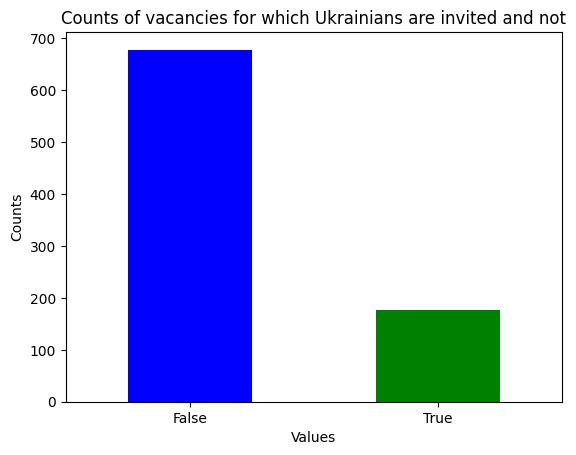

In [163]:
counts = df["ukrainian_people"].value_counts()
counts.plot(kind="Values", color=["blue", "green"])
plt.title("Counts of vacancies for which Ukrainians are invited and not")
plt.xlabel("Values")
plt.ylabel("Counts")
plt.xticks([0, 1], ["False", "True"], rotation=0)
plt.show()


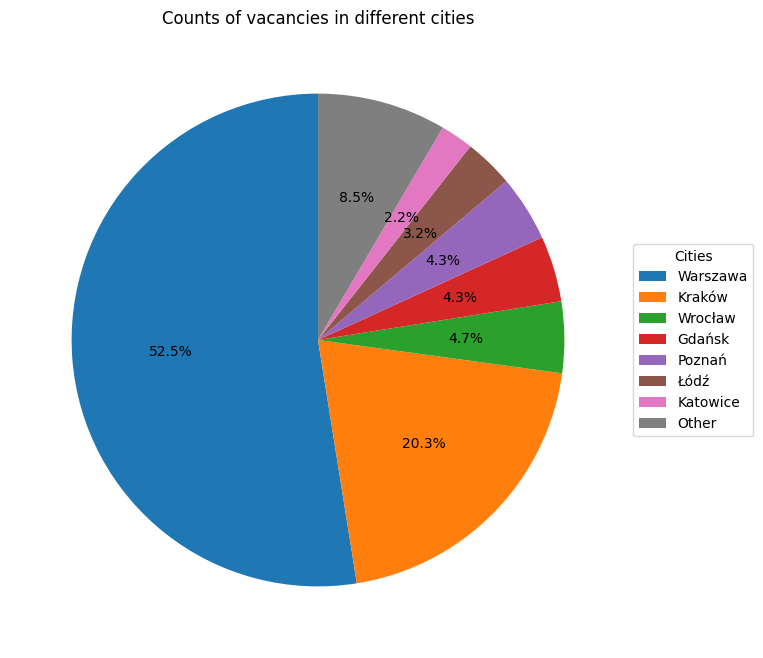

In [164]:
city_counts = df["city"].value_counts()
limit = city_counts.sum() * 0.02
others = city_counts[city_counts < limit].sum()
filtered_data = city_counts[city_counts >= limit]
filtered_data["Other"] = others

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(filtered_data, autopct="%1.1f%%", startangle=90)
plt.title("Counts of vacancies in different cities")
plt.legend(filtered_data.index, title="Cities", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

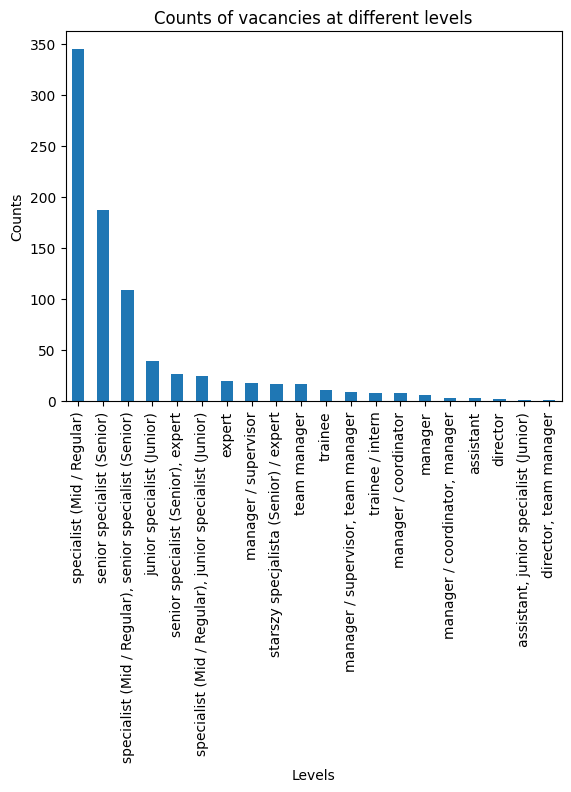

In [165]:
level_counts = df["level"].value_counts()
level_counts.plot(kind="bar")
plt.title("Counts of vacancies at different levels")
plt.xlabel("Levels")
plt.ylabel("Counts")
plt.show()

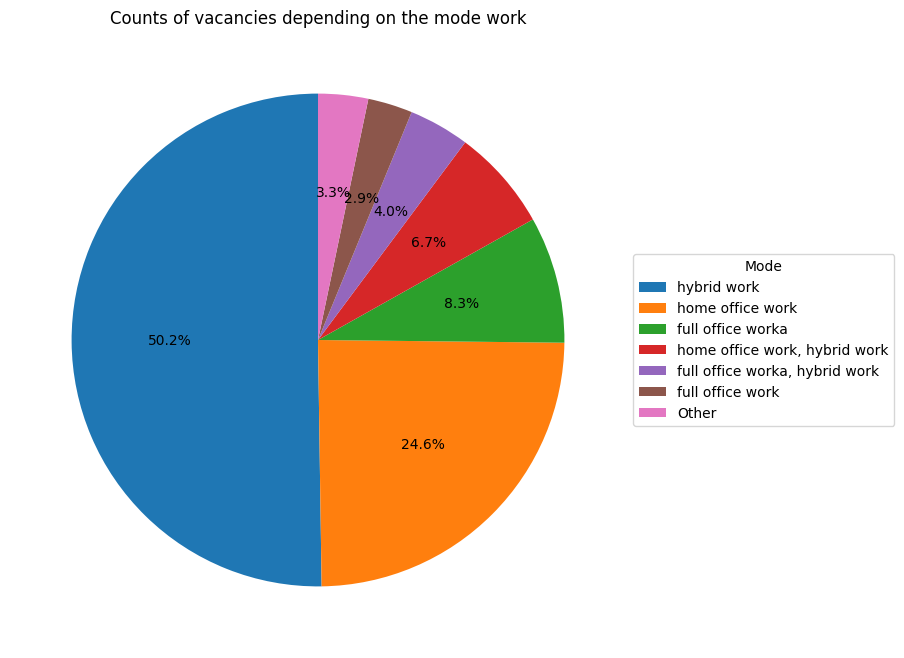

In [168]:
work_mode = df["work mode"].value_counts()
limit = work_mode.sum() * 0.02
others = work_mode[work_mode < limit].sum()
filtered_data = work_mode[work_mode >= limit]
filtered_data["Other"] = others

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(filtered_data, autopct="%1.1f%%", startangle=90)
plt.title("Counts of vacancies depending on the mode work")
plt.legend(filtered_data.index, title="Mode", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()